## MBTA Headway Predictor

In [90]:
import pandas as pd
from datetime import datetime, timedelta

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

### MBTA Headway stop_id 70061

The data represented in this notebook is from one of the following stops:

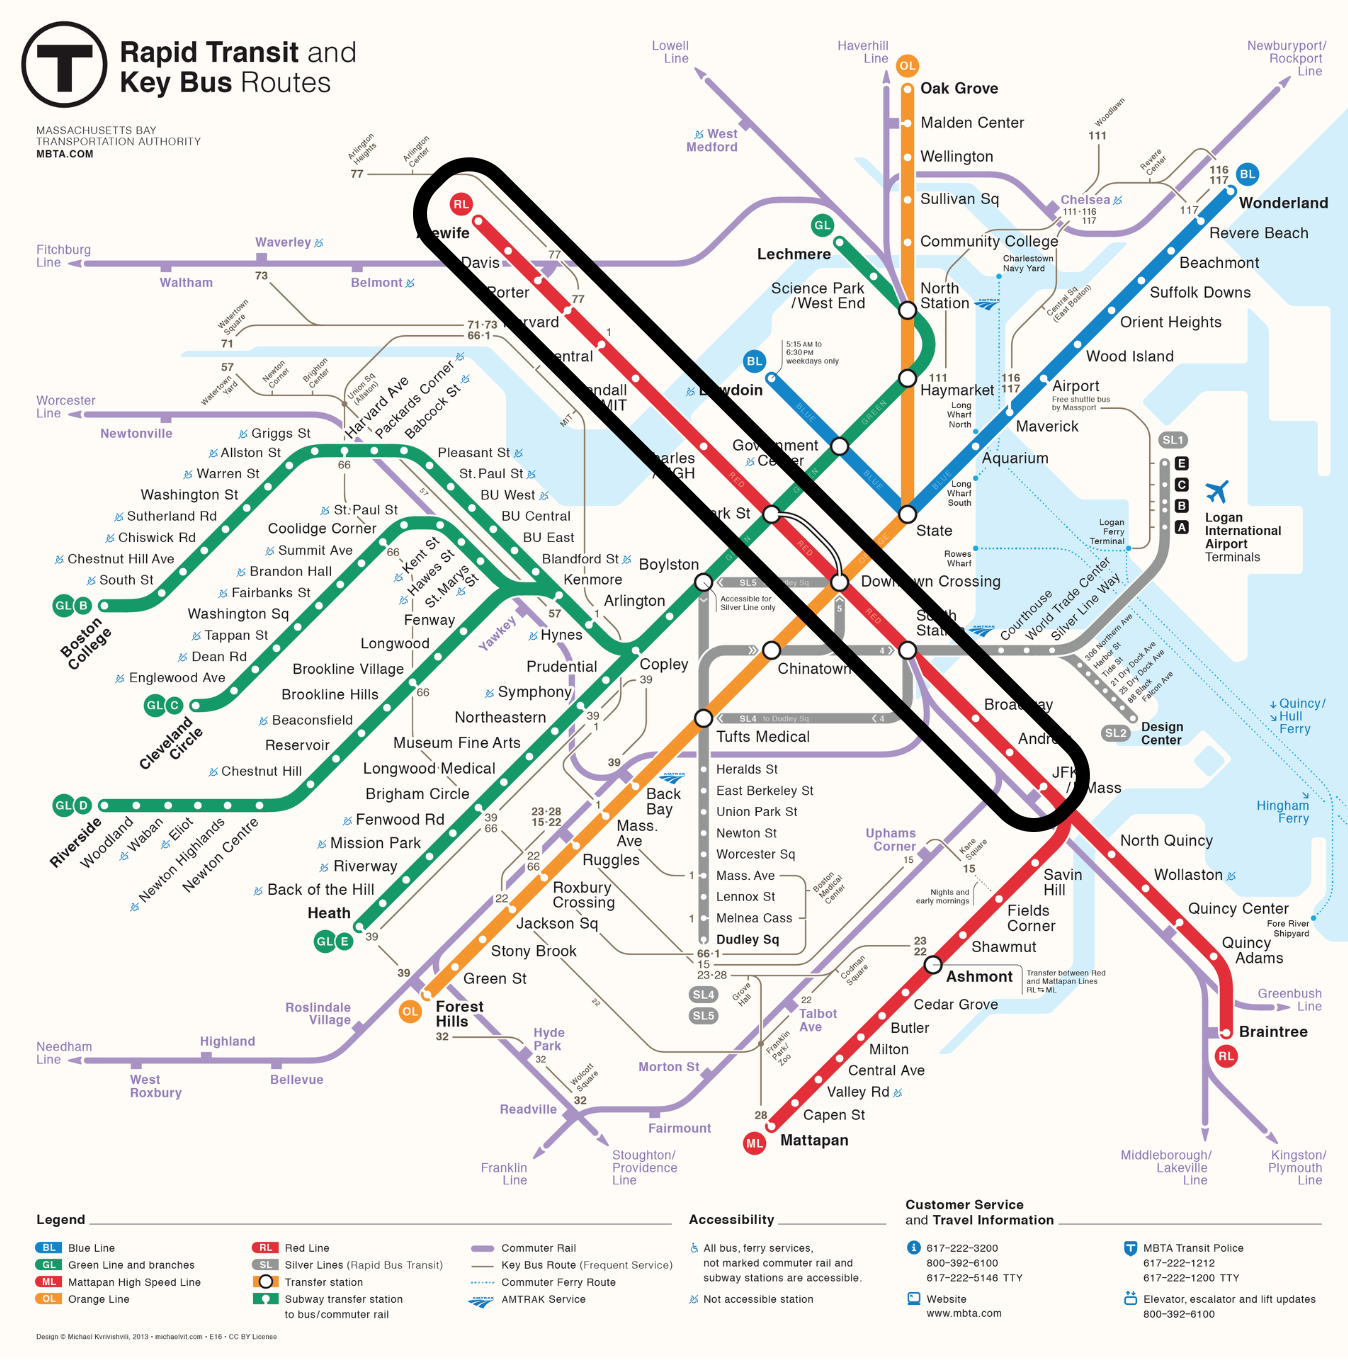

img src:
https://en.wikipedia.org/wiki/List_of_MBTA_subway_stations#/media/File:2013_unofficial_MBTA_subway_map_by_Michael_Kvrivishvili.png

In [91]:
# style charts
# plt.style.use('ggplot')
sns.set()

In [66]:
df = pd.read_csv('MBTA_Rapid_Transit_Headways_2019.csv')
df

,service_date,route_id,direction_id,stop_id,start_time_sec,end_time_sec,headway_time_sec,destination,ObjectId
0,2019-09-01T00:00:00.000Z,Red,0,70061,45008,45362,354,Southbound,8925268
1,2019-09-01T00:00:00.000Z,Red,0,70061,45008,45751,743,Braintree,8925269
2,2019-09-01T00:00:00.000Z,Red,0,70061,45362,45751,389,Southbound,8925270
3,2019-09-01T00:00:00.000Z,Red,0,70061,45362,46143,781,Ashmont,8925271
4,2019-09-01T00:00:00.000Z,Red,0,70061,45751,46143,392,Southbound,8925273
...,...,...,...,...,...,...,...,...,...
526,2019-09-02T00:00:00.000Z,Red,0,70061,86706,87041,335,Southbound,8958868
527,2019-09-02T00:00:00.000Z,Red,0,70061,86706,87369,663,Braintree,8958869
528,2019-09-02T00:00:00.000Z,Red,0,70061,87041,87369,328,Southbound,8958870
529,2019-09-02T00:00:00.000Z,Red,0,70061,87041,88115,1074,Ashmont,8958871


In [67]:
df.service_date = pd.to_datetime(df.service_date)
df.dtypes

service_date        datetime64[ns, UTC]
route_id                         object
direction_id                      int64
stop_id                           int64
start_time_sec                    int64
end_time_sec                      int64
headway_time_sec                  int64
destination                      object
ObjectId                          int64
dtype: object

In [68]:
df['service_timedelta'] = df.start_time_sec.apply(lambda x: timedelta(seconds = x))
df['service_datetime'] = df.service_date + df['service_timedelta']
df.set_index('service_datetime', inplace=True)
df

,service_date,route_id,direction_id,stop_id,start_time_sec,end_time_sec,headway_time_sec,destination,ObjectId,service_timedelta
service_datetime,,,,,,,,,,
2019-09-01 12:30:08+00:00,2019-09-01 00:00:00+00:00,Red,0,70061,45008,45362,354,Southbound,8925268,0 days 12:30:08
2019-09-01 12:30:08+00:00,2019-09-01 00:00:00+00:00,Red,0,70061,45008,45751,743,Braintree,8925269,0 days 12:30:08
2019-09-01 12:36:02+00:00,2019-09-01 00:00:00+00:00,Red,0,70061,45362,45751,389,Southbound,8925270,0 days 12:36:02
2019-09-01 12:36:02+00:00,2019-09-01 00:00:00+00:00,Red,0,70061,45362,46143,781,Ashmont,8925271,0 days 12:36:02
2019-09-01 12:42:31+00:00,2019-09-01 00:00:00+00:00,Red,0,70061,45751,46143,392,Southbound,8925273,0 days 12:42:31
...,...,...,...,...,...,...,...,...,...,...
2019-09-03 00:05:06+00:00,2019-09-02 00:00:00+00:00,Red,0,70061,86706,87041,335,Southbound,8958868,1 days 00:05:06
2019-09-03 00:05:06+00:00,2019-09-02 00:00:00+00:00,Red,0,70061,86706,87369,663,Braintree,8958869,1 days 00:05:06
2019-09-03 00:10:41+00:00,2019-09-02 00:00:00+00:00,Red,0,70061,87041,87369,328,Southbound,8958870,1 days 00:10:41


In [102]:
headway_df = df[['headway_time_sec', 'destination']]
headway_df['headway_time_min'] = df['headway_time_sec'].divide(60)
headway_df.drop('headway_time_sec', axis=1, inplace=True)
headway_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,destination,headway_time_min
service_datetime,,
2019-09-01 12:30:08+00:00,Southbound,5.900000
2019-09-01 12:30:08+00:00,Braintree,12.383333
2019-09-01 12:36:02+00:00,Southbound,6.483333
2019-09-01 12:36:02+00:00,Ashmont,13.016667
2019-09-01 12:42:31+00:00,Southbound,6.533333
...,...,...
2019-09-03 00:05:06+00:00,Southbound,5.583333
2019-09-03 00:05:06+00:00,Braintree,11.050000
2019-09-03 00:10:41+00:00,Southbound,5.466667


In [107]:
dest_types = headway_df.destination.unique()
dest_types

array(['Southbound', 'Braintree', 'Ashmont'], dtype=object)

In [109]:
headway_df = headway_df.pivot(index=headway_df.index, columns='destination')

<Figure size 1440x1440 with 0 Axes>

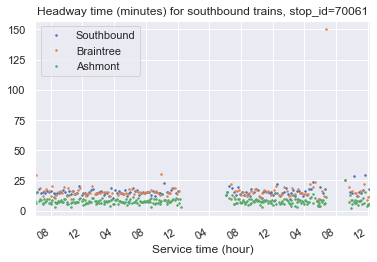

In [110]:
plt.figure(figsize=(20,20))
ax = headway_df.plot(linestyle='none', marker='.', ms=3)
plt.title('Headway time (minutes) for southbound trains, stop_id=70061')
plt.xlabel('Service time (hour)')

ax.xaxis_date()
hourly = DateFormatter("%I")
ax.xaxis.set_major_formatter(hourly)

plt.legend(dest_types)
plt.show()

In [44]:
# need to upsample time and fill after large wait times

In [111]:
# this stop has two tracks with three destination categories 
# TODO find more stop 

In [112]:
# try getting data through API instead

In [ ]:
# 

In [ ]:
# predictor already exists in google